# Задание 1

In [1]:
import numpy as np
import seaborn as sns
from math import pow
from scipy.optimize import fsolve
import scipy.stats as ss
from scipy.optimize import differential_evolution, minimize

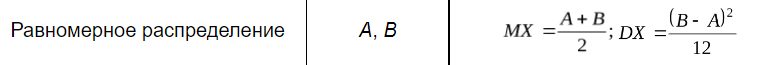

В равномерном распределении есть два параметра, которые мы можем оценить, начало и конец отрезка

Сгенерируем генеральную выборку, найдём оценки и проверим их на состоятельность и несмещённость

## Метод моментов

In [2]:
np.random.seed(2837)

A = 32
B = 32 + 32/16

def check_evals_by_moments(start, stop, size):
  uniform = np.random.uniform(start, stop, size)
  sns.histplot(uniform)

  MX = uniform.mean()
  DX = pow(uniform.std(), 2)

  def equations(vars):
    x, y = vars
    eq1 = x+y-MX*2
    eq2 = (y - x)**2-DX*12
    return [eq1, eq2]


  x, y =  fsolve(equations, (1, 1))

  print(f'Estimate left bound: {x}', f'Estimate right bound: {y}', sep='\n')
  print(f'Left bound deviation: {abs(x - start)}',
        f'Right bound deviation: {abs(y - stop)}', sep='\n')

Estimate left bound: 32.073494364220814
Estimate right bound: 34.18007611666258
Left bound deviation: 0.07349436422081368
Right bound deviation: 0.18007611666258327


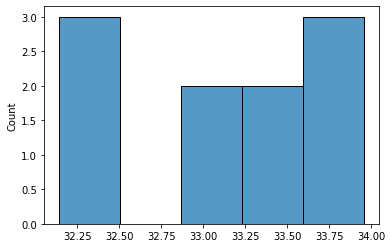

In [3]:
check_evals_by_moments(A, B, 10)

Estimate left bound: 32.11255172551091
Estimate right bound: 33.99828493809366
Left bound deviation: 0.11255172551091164
Right bound deviation: 0.001715061906338633


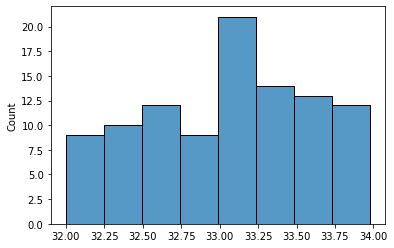

In [4]:
check_evals_by_moments(A, B, 100)

Estimate left bound: 31.99843058763787
Estimate right bound: 34.04333431789879
Left bound deviation: 0.0015694123621301515
Right bound deviation: 0.04333431789878972


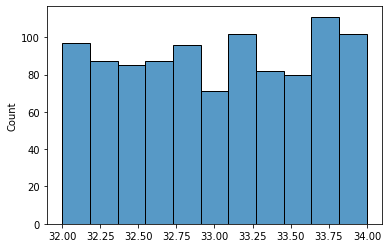

In [5]:
check_evals_by_moments(A, B, 1000)

Estimate left bound: 31.990335310331854
Estimate right bound: 34.011888126180956
Left bound deviation: 0.009664689668145598
Right bound deviation: 0.011888126180956249


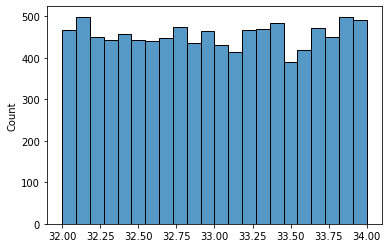

In [6]:
check_evals_by_moments(A, B, 10000)

### Вывод

При увеличении n оценки сходятся к генеральным характеристикам, однако не равны им. Из чего следует, что оценки состоятельные, но смещённые

## Метод максимального правдоподобия

In [7]:
def check_evals_by_likehood(start, stop, size):
  uniform = np.random.uniform(start, stop, size)
  sns.histplot(uniform)

  def log_likelihood(theta_hat):
    a_hat, b_hat = theta_hat
    return -len(uniform) * np.log(b_hat - a_hat)

  def negative_log_likelihood(theta_hat):
      return -log_likelihood(theta_hat)

  bounds = [[-1e10, uniform.min()], [uniform.max(), 1e10]]
  print(differential_evolution(negative_log_likelihood, bounds=bounds))

     fun: 3.4407244743042376
     jac: array([-7.08877569,  7.08877569])
 message: 'Optimization terminated successfully.'
    nfev: 3666
     nit: 121
 success: True
       x: array([32.00498583, 33.41566666])


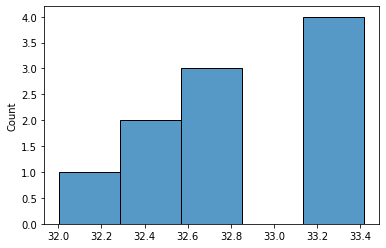

In [8]:
check_evals_by_likehood(A, B, 10)

     fun: 68.48444547093435
     jac: array([-50.41686402,  50.41686402])
 message: 'Optimization terminated successfully.'
    nfev: 3396
     nit: 112
 success: True
       x: array([32.0135272 , 33.99699049])


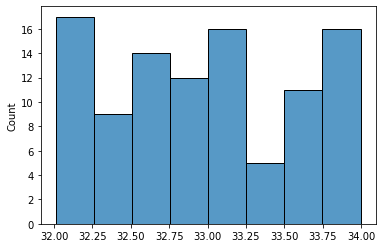

In [9]:
check_evals_by_likehood(A, B, 100)

     fun: 693.0495963513057
     jac: array([-500.04879723,  500.04879723])
 message: 'Optimization terminated successfully.'
    nfev: 3096
     nit: 102
 success: True
       x: array([32.00016741, 33.99997225])


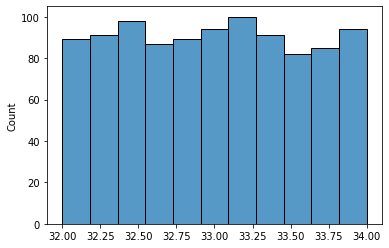

In [10]:
check_evals_by_likehood(A, B, 1000)

     fun: 6927.443229605853
     jac: array([-5002.01471818,  5002.01471818])
 message: 'Optimization terminated successfully.'
    nfev: 3426
     nit: 113
 success: True
       x: array([32.00073808, 33.99993253])


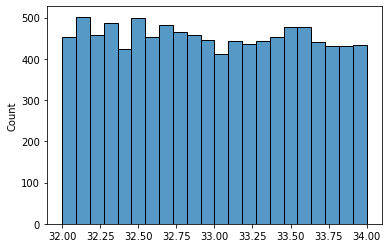

In [11]:
check_evals_by_likehood(A, B, 10000)

## Вывод

Как видим, оценки сходятся ещё сильнее, поэтому оценки состоятельные, но по прежнему не равны генеральным характеристика, т.е. немного смещены, но также неплохо описывают генеральную совокупность, даже лучше чем оценки, полученные методом моментов

# Задание 2

In [12]:
A = 32
B = 33

## Метод моментов



Estimate left bound: 32.98175947729589
Estimate right bound: 31.960162374487684
Left bound deviation: 0.9817594772958884
Right bound deviation: 1.039837625512316


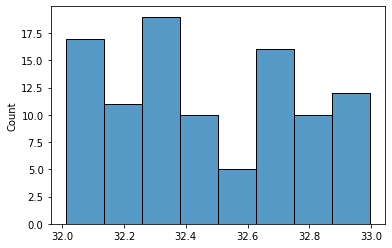

In [13]:
check_evals_by_moments(A, B, 100)

Estimate left bound: 32.99997799167181
Estimate right bound: 31.999599202656917
Left bound deviation: 0.9999779916718126
Right bound deviation: 1.000400797343083


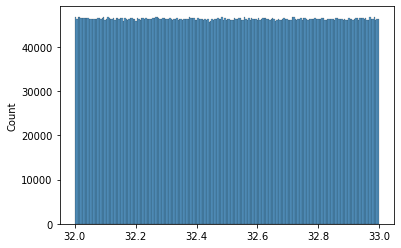

In [14]:
check_evals_by_moments(A, B, 10000000)

### Вывод

Видим, что оценки несостоятельные и смещённые

## Метод максимального правдоподобия

     fun: -1.152840908887149
 message: 'Optimization terminated successfully.'
    nfev: 4353
     nit: 144
 success: True
       x: array([32.00360298, 32.99214077])


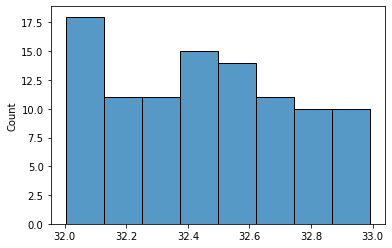

In [15]:
check_evals_by_likehood(A, B, 100)

     fun: -7.629423635228488
 message: 'Optimization terminated successfully.'
    nfev: 4623
     nit: 153
 success: True
       x: array([32.00000763, 33.        ])


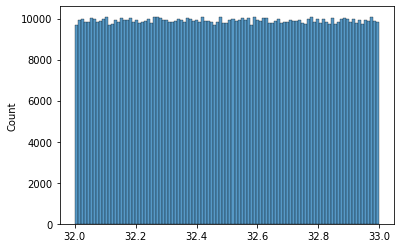

In [16]:
check_evals_by_likehood(A, B, 1000000)

## Вывод

Видим, что оценка левой границы состоятельная, а правой нет, обе смещены

# Задача 3

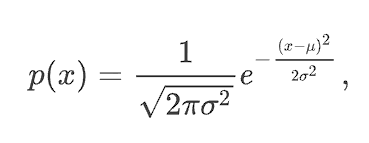

Можем оценить два параметра ню(мат. ожидание) и сигма(стандартное отклонение)

In [17]:
ex = 32
dev = 32/2 + 1

## Метод моментов

In [18]:
norm = np.random.normal(ex, dev, 10)

print(f'Estimate expected value: {norm.mean()}', f'Estimate sygma: {norm.std()}', sep='\n')
print(f'Expected value deviation: {abs(norm.mean() - ex)}',
      f'Sygma deviation: {abs(norm.std() - dev)}', sep='\n')

Estimate expected value: 30.563617809009617
Estimate sygma: 10.445003375538446
Expected value deviation: 1.4363821909903827
Sygma deviation: 6.554996624461554


In [19]:
norm = np.random.normal(ex, dev, 100)

print(f'Estimate expected value: {norm.mean()}', f'Estimate sygma: {norm.std()}', sep='\n')
print(f'Expected value deviation: {abs(norm.mean() - ex)}',
      f'Sygma deviation: {abs(norm.std() - dev)}', sep='\n')

Estimate expected value: 27.453926818998493
Estimate sygma: 15.960794220914819
Expected value deviation: 4.546073181001507
Sygma deviation: 1.0392057790851812


In [20]:
norm = np.random.normal(ex, dev, 1000)

print(f'Estimate expected value: {norm.mean()}', f'Estimate sygma: {norm.std()}', sep='\n')
print(f'Expected value deviation: {abs(norm.mean() - ex)}',
      f'Sygma deviation: {abs(norm.std() - dev)}', sep='\n')

Estimate expected value: 31.544432864482506
Estimate sygma: 16.749128218663966
Expected value deviation: 0.4555671355174944
Sygma deviation: 0.25087178133603416


In [21]:
norm = np.random.normal(ex, dev, 10000)

print(f'Estimate expected value: {norm.mean()}', f'Estimate sygma: {norm.std()}', sep='\n')
print(f'Expected value deviation: {abs(norm.mean() - ex)}',
      f'Sygma deviation: {abs(norm.std() - dev)}', sep='\n')

Estimate expected value: 32.06588054403578
Estimate sygma: 17.04868038324411
Expected value deviation: 0.06588054403577814
Sygma deviation: 0.04868038324411117


### Вывод

Оценка мат ожидания состоятельная, т.к. отклонение сходится к 0, а оцненка стандартного отклонения вроде как состоятельная, так как в конце всё таки сходится к 0, и обе они смещённые

## Метод максимального правдоподобия

In [22]:
def get_norm_evals(m, syg, size):
  norm = np.random.normal(m, syg, size)

  def norm_likelihood(vars):
    return -np.sum([ss.norm.logpdf(x, vars[0], vars[1]) for x in norm])

  init_guess = [0, 1]
  log_result = minimize(norm_likelihood, init_guess, bounds=[(-np.inf, np.inf), (0, np.inf)])

  print(f'Estimate expected value: {log_result.x[0]}', f'Estimate sygma: {log_result.x[1]}', sep='\n')
  print(f'Expected value deviation: {abs(log_result.x[0] - m)}',
      f'Sygma deviation: {abs(log_result.x[1] - syg)}', sep='\n')
  
get_norm_evals(ex, dev, 10)

Estimate expected value: 40.25159045720501
Estimate sygma: 20.63178058905252
Expected value deviation: 8.251590457205012
Sygma deviation: 3.6317805890525214


In [23]:
get_norm_evals(ex, dev, 100)

Estimate expected value: 31.241234088193178
Estimate sygma: 16.250550302302635
Expected value deviation: 0.7587659118068224
Sygma deviation: 0.749449697697365


In [24]:
get_norm_evals(ex, dev, 1000)

Estimate expected value: 31.43458321801652
Estimate sygma: 16.484847911100175
Expected value deviation: 0.5654167819834797
Sygma deviation: 0.5151520888998249


In [25]:
get_norm_evals(ex, dev, 10000)

Estimate expected value: 32.065631400241855
Estimate sygma: 16.966904057311428
Expected value deviation: 0.06563140024185543
Sygma deviation: 0.033095942688571967


### Вывод

Обе оценки состоятельные и смещённые, так как не равны характеристикам генеральной совокупности